**Hyperparameter Tuning with KFold Cross Validation**
- Dataset:- apple_stocks.csv
- Model:- Random Forest Classifier

In [47]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [48]:
# Load Data
df = pd.read_csv('apple_stocks.csv')
df.head()

,Date,Open,High,Low,Close,Volume
0,7-Jul-17,142.90,144.75,142.90,144.18,19201712
1,6-Jul-17,143.02,143.50,142.41,142.73,24128782
2,5-Jul-17,143.69,144.79,142.72,144.09,21569557
3,3-Jul-17,144.88,145.30,143.10,143.50,14277848
4,30-Jun-17,144.45,144.96,143.78,144.02,23024107


In [49]:
# Meta data
print("No. of rows: ", df.shape[0])
print("No. of columns: ", df.shape[1])
all_columns = df.columns.to_list()
num_columns = df.select_dtypes(include = "number").columns.to_list()
cat_columns = df.select_dtypes(include = "object").columns.to_list()
print("All columns: \n", all_columns)
print("\nNumeric columns: \n", num_columns)
print("\nCategorical columns: \n", cat_columns)
print("\nInfo: \n")
df.info()

No. of rows:  129
No. of columns:  6
All columns: 
 ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']

Numeric columns: 
 ['Open', 'High', 'Low', 'Close', 'Volume']

Categorical columns: 
 ['Date']

Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    129 non-null    object 
 1   Open    129 non-null    float64
 2   High    129 non-null    float64
 3   Low     129 non-null    float64
 4   Close   129 non-null    float64
 5   Volume  129 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 6.2+ KB


In [50]:
# Duplicate
print("Duplicate count: ", df.duplicated().sum())

Duplicate count:  0


In [51]:
# Change Date Format to Date
df['Date'] = pd.to_datetime(df['Date'],format='%d-%b-%y')
df.info()
df.set_index('Date', inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    129 non-null    datetime64[ns]
 1   Open    129 non-null    float64       
 2   High    129 non-null    float64       
 3   Low     129 non-null    float64       
 4   Close   129 non-null    float64       
 5   Volume  129 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 6.2 KB


In [52]:
# Null Values
print ("Null values : \n")
df.isnull().sum()

Null values : 



,0
Open,0
High,0
Low,0
Close,0
Volume,0


In [53]:
# Descriptive Statistics
df.describe()

,Open,High,Low,Close,Volume
count,129.000000,129.000000,129.000000,129.000000,1.290000e+02
mean,139.826977,140.683953,139.050155,139.975349,2.706259e+07
std,11.007846,11.009166,10.705675,10.781804,1.202048e+07
min,115.800000,116.330000,114.760000,116.020000,1.424635e+07
25%,135.670000,136.270000,135.100000,135.720000,2.035000e+07
50%,142.110000,142.920000,141.110000,142.270000,2.357509e+07
75%,145.740000,147.140000,144.940000,145.870000,3.037938e+07
max,156.010000,156.650000,155.050000,156.100000,1.119850e+08


**EDA**

In [54]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-07-07,142.90,144.75,142.90,144.18,19201712
2017-07-06,143.02,143.50,142.41,142.73,24128782
2017-07-05,143.69,144.79,142.72,144.09,21569557
2017-07-03,144.88,145.30,143.10,143.50,14277848
2017-06-30,144.45,144.96,143.78,144.02,23024107


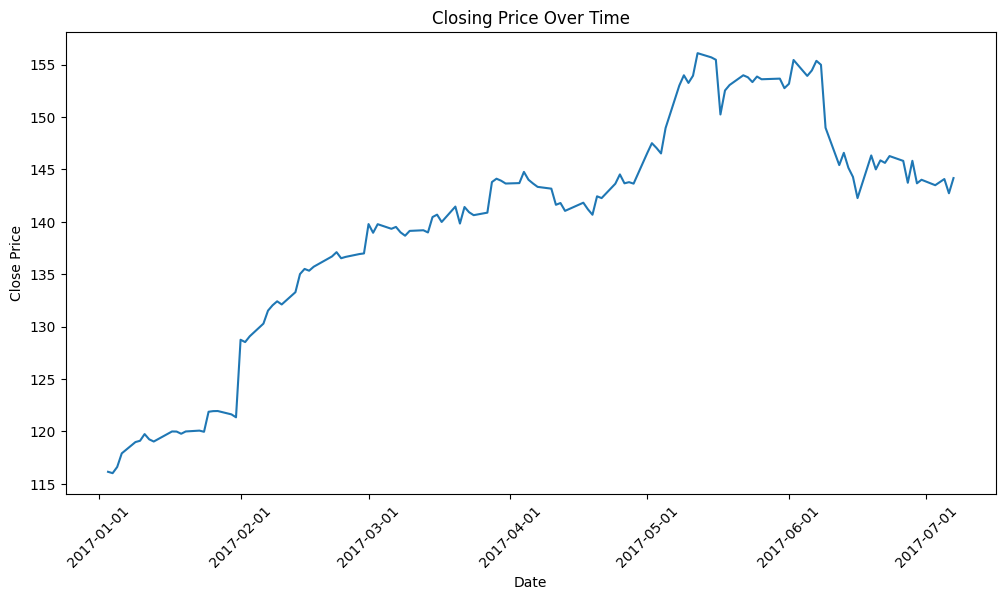

In [55]:
# Price Trend Visualization
plt.figure(figsize=(12,6))

plt.plot(df.index, df['Close'])   # Use Date index explicitly

plt.title("Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")

# Format date on X-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())

plt.xticks(rotation=45)
plt.show()

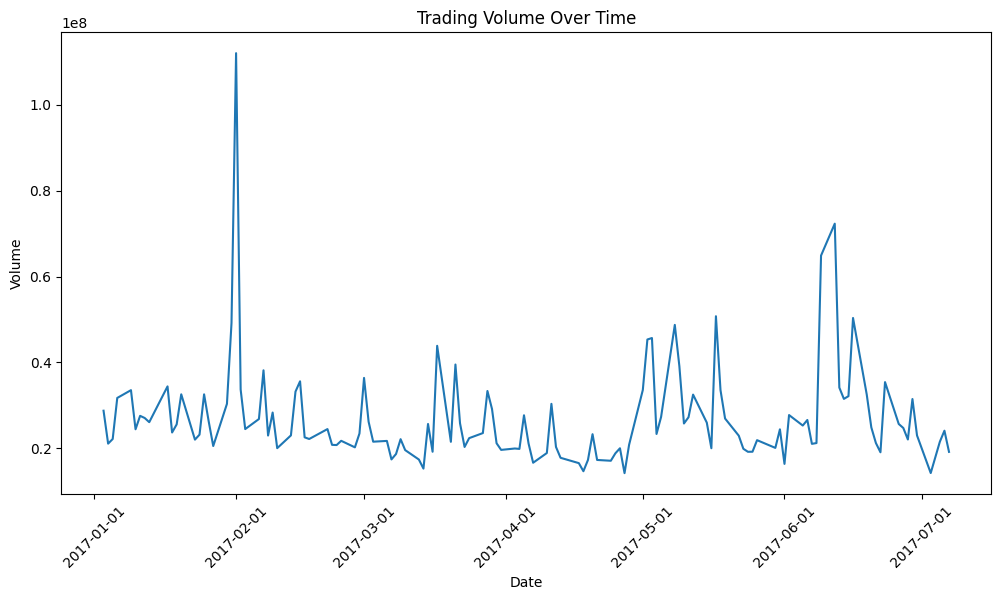

In [56]:
 #Volume Visualization

plt.figure(figsize=(12,6))

plt.plot(df.index, df['Volume'])

plt.title("Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")

# Format date on X-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())

plt.xticks(rotation=45)
plt.show()

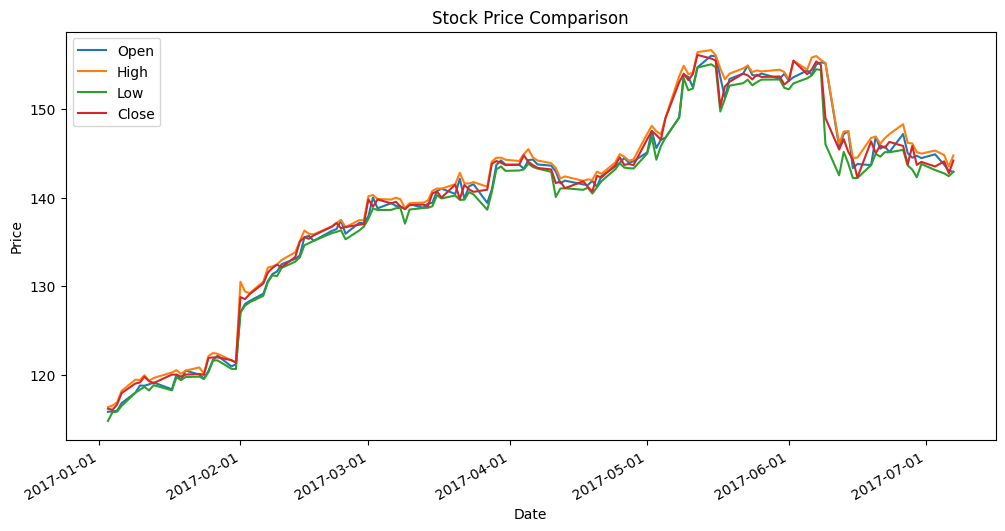

In [57]:
# Open, High, Low, Close Comparison
df[['Open','High','Low','Close']].plot(figsize=(12,6))
plt.title("Stock Price Comparison")
plt.xlabel("Date")
plt.ylabel("Price")
# Format date on X-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())

plt.show()

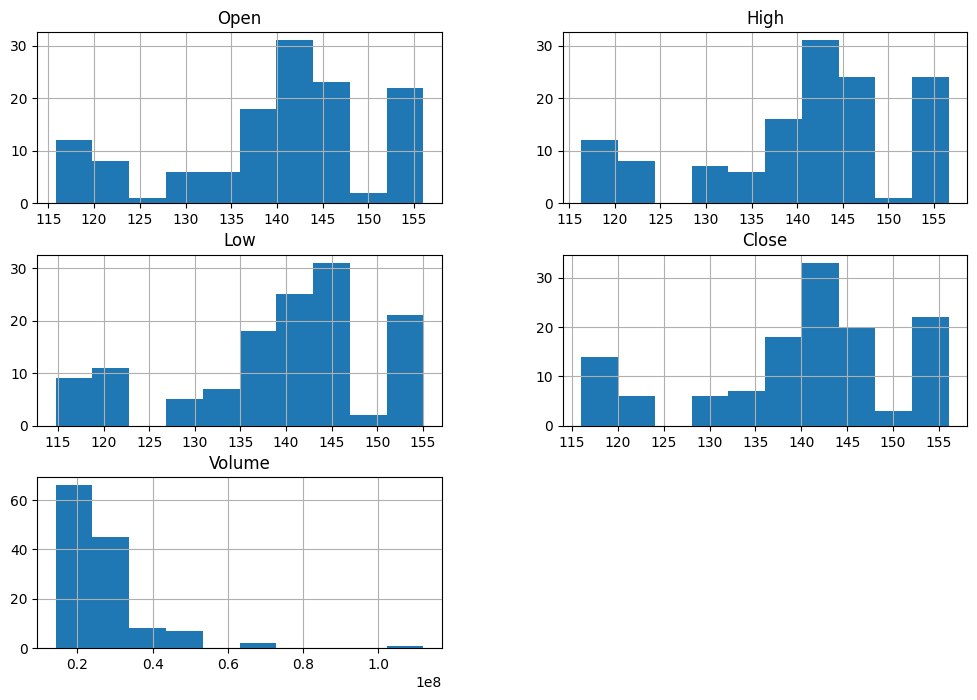

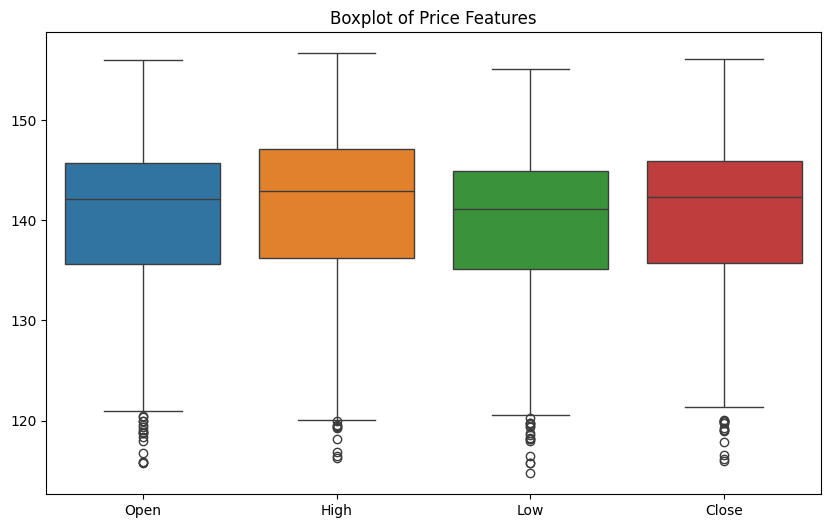

In [58]:
# Distribution Plots
df.hist(figsize=(12,8))
plt.show()
plt.figure(figsize=(10,6))
sns.boxplot(data=df[['Open','High','Low','Close']])
plt.title("Boxplot of Price Features")
plt.show()


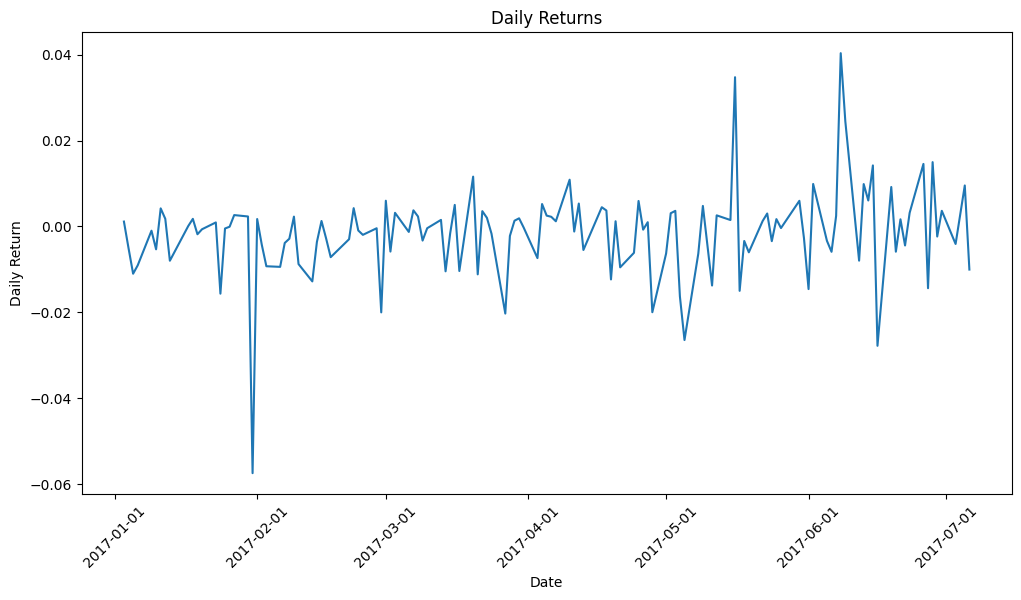

In [59]:
# Daily Returns

df['Daily_Return'] = df['Close'].pct_change()

plt.figure(figsize=(12,6))

plt.plot(df.index, df['Daily_Return'])   # Date on X-axis

plt.title("Daily Returns")
plt.xlabel("Date")
plt.ylabel("Daily Return")

# Format date
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())

plt.xticks(rotation=45)
plt.show()

In [60]:
# Adding Features

# Daily return
df['Daily_Return'] = df['Close'].pct_change()

# Price change
df['Price_Change'] = df['Close'] - df['Open']

# High-Low range
df['High_Low_Range'] = df['High'] - df['Low']

# Moving average
df['MA20'] = df['Close'].rolling(20).mean()

# Lag features
df['Close_Lag1'] = df['Close'].shift(1)
df['Close_Lag2'] = df['Close'].shift(2)

In [61]:
df.head()

,Open,High,Low,Close,Volume,Daily_Return,Price_Change,High_Low_Range,MA20,Close_Lag1,Close_Lag2
Date,,,,,,,,,,,
2017-07-07,142.90,144.75,142.90,144.18,19201712,NaN,1.28,1.85,NaN,NaN,NaN
2017-07-06,143.02,143.50,142.41,142.73,24128782,-0.010057,-0.29,1.09,NaN,144.18,NaN
2017-07-05,143.69,144.79,142.72,144.09,21569557,0.009528,0.40,2.07,NaN,142.73,144.18
2017-07-03,144.88,145.30,143.10,143.50,14277848,-0.004095,-1.38,2.20,NaN,144.09,142.73
2017-06-30,144.45,144.96,143.78,144.02,23024107,0.003624,-0.43,1.18,NaN,143.50,144.09


In [62]:
# Remove null values
df.dropna(inplace=True)
df.head()

,Open,High,Low,Close,Volume,Daily_Return,Price_Change,High_Low_Range,MA20,Close_Lag1,Close_Lag2
Date,,,,,,,,,,,
2017-06-09,155.19,155.19,146.02,148.98,64882657,0.024481,-6.21,9.17,144.9710,145.42,146.59
2017-06-08,155.25,155.54,154.40,154.99,21250798,0.040341,-0.26,1.14,145.5115,148.98,145.42
2017-06-07,155.02,155.98,154.48,155.37,21069647,0.002452,0.35,1.50,146.1435,154.99,148.98
2017-06-06,153.90,155.81,153.78,154.45,26624926,-0.005921,0.55,2.03,146.6615,155.37,154.99
2017-06-05,154.34,154.45,153.46,153.93,25331662,-0.003367,-0.41,0.99,147.1830,154.45,155.37


In [63]:
# Date Column converted to year, month and day
df.index = pd.to_datetime(df.index) # Ensure index is DatetimeIndex
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day
df['DayOfWeek'] = df.index.dayofweek
df['Quarter'] = df.index.quarter
df.head()

,Open,High,Low,Close,Volume,Daily_Return,Price_Change,High_Low_Range,MA20,Close_Lag1,Close_Lag2,Year,Month,Day,DayOfWeek,Quarter
Date,,,,,,,,,,,,,,,,
2017-06-09,155.19,155.19,146.02,148.98,64882657,0.024481,-6.21,9.17,144.9710,145.42,146.59,2017,6,9,4,2
2017-06-08,155.25,155.54,154.40,154.99,21250798,0.040341,-0.26,1.14,145.5115,148.98,145.42,2017,6,8,3,2
2017-06-07,155.02,155.98,154.48,155.37,21069647,0.002452,0.35,1.50,146.1435,154.99,148.98,2017,6,7,2,2
2017-06-06,153.90,155.81,153.78,154.45,26624926,-0.005921,0.55,2.03,146.6615,155.37,154.99,2017,6,6,1,2
2017-06-05,154.34,154.45,153.46,153.93,25331662,-0.003367,-0.41,0.99,147.1830,154.45,155.37,2017,6,5,0,2


In [64]:
# Remove Date index:
df.reset_index(drop=True, inplace=True)
df.head()

,Open,High,Low,Close,Volume,Daily_Return,Price_Change,High_Low_Range,MA20,Close_Lag1,Close_Lag2,Year,Month,Day,DayOfWeek,Quarter
0,155.19,155.19,146.02,148.98,64882657,0.024481,-6.21,9.17,144.9710,145.42,146.59,2017,6,9,4,2
1,155.25,155.54,154.40,154.99,21250798,0.040341,-0.26,1.14,145.5115,148.98,145.42,2017,6,8,3,2
2,155.02,155.98,154.48,155.37,21069647,0.002452,0.35,1.50,146.1435,154.99,148.98,2017,6,7,2,2
3,153.90,155.81,153.78,154.45,26624926,-0.005921,0.55,2.03,146.6615,155.37,154.99,2017,6,6,1,2
4,154.34,154.45,153.46,153.93,25331662,-0.003367,-0.41,0.99,147.1830,154.45,155.37,2017,6,5,0,2


In [65]:
# Define features (X) and target (y)
df["Target"] = (df["Price_Change"] > 0).astype(int)

# Drop rows where the 'Target' is NaN
df.dropna(subset=['Target'], inplace=True)

X = df.drop(['Target'], axis=1)
y = df['Target']

In [66]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
# Create a Random Forest regressor
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)

**Hyperparameter grid to search**

In [68]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_features': ['sqrt', 'log2'], # Number of features to consider at each split
    'max_depth': [4, 6, 8, 10],      # Maximum depth of the tree
    'criterion': ['gini', 'entropy'] # Function to measure the quality of a split for classification
}

In [69]:
# Perform Grid Search with cross-validation (e.g., K=5)
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring=['accuracy','precision','recall','f1'], refit='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200, 300]},
             refit='accuracy',
             scoring=['accuracy', 'precision', 'recall', 'f1'])

In [70]:
# Get the best hyperparameters
best_params = grid_search.best_params_

In [71]:
# Implement K-Fold Cross-Validation to assess model performance.

print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score (Accuracy): {grid_search.best_score_}")

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 200}
Best Cross-Validation Score (Accuracy): 0.9888888888888889


In [72]:
# Train a RandomForest classifier with the best hyperparameters
best_clf = RandomForestClassifier(random_state=42, **best_params)
best_clf.fit(X_train, y_train)


RandomForestClassifier(max_depth=8, n_estimators=200, random_state=42)

In [73]:
# Evaluate the model on the test set
from sklearn.metrics import accuracy_score
y_pred = best_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [74]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

print(f"Test Set Accuracy: {accuracy:.4f}")
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred))
#individual scores:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Test Set Precision: {precision:.4f}")
print(f"Test Set Recall: {recall:.4f}")
print(f"Test Set F1-Score: {f1:.4f}")


Test Set Accuracy: 0.9545

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.89      1.00      0.94         8

    accuracy                           0.95        22
   macro avg       0.94      0.96      0.95        22
weighted avg       0.96      0.95      0.96        22

Test Set Precision: 0.8889
Test Set Recall: 1.0000
Test Set F1-Score: 0.9412


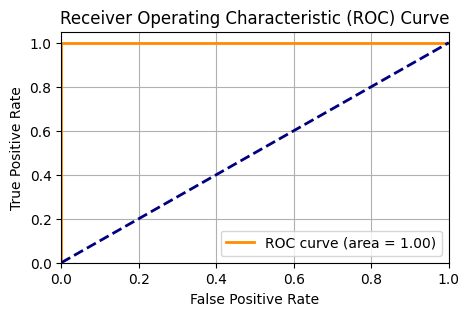

AUC Score: 1.0000


In [75]:
# ROC Curve and AUC

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for the positive class
y_pred_proba = best_clf.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print(f"AUC Score: {roc_auc:.4f}")

# Interpretation
The ROC curve goes straight up to (0,1) and then across the top.

This means:

True Positive Rate (TPR) = 1

False Positive Rate (FPR) = 0

The model separates both classes without any overlap and correctly distinguishes between Class 0 and Classs 1 for all test samples.
